# Lab 4 Bell Circuit & GHZ Circuit

Prerequisite   
[Ch.2.2 Multiple Qubits and Entangled States](https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html)

Other relevant materials   
[Circuit Tutorial: Getting Started with Qiskit](https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html)

Applications   
[Ch.3.11 Quantum Teleportation](https://qiskit.org/textbook/ch-algorithms/teleportation.html)   
[Ch.3.12 Superdense Coding](https://qiskit.org/textbook/ch-algorithms/superdense-coding.html)   
[Ch.3.13 Quantum Key Distribution](https://qiskit.org/textbook/ch-algorithms/quantum-key-distribution.html)


In [1]:
#import numpy as np
#from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
#from qiskit import IBMQ, Aer, transpile, assemble
#from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere

# Importing standard Qiskit libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, plot_state_city, plot_state_paulivec, plot_state_hinton

# Ignote warnings
import warnings
warnings.filterwarnings('ignore')

# Define backend
sim = Aer.get_backend('aer_simulator')

<h2 style="font-size:24px;">Part 1: Bell State using Controlled-X gate</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Create Bell state using CNOT or controlled-X gate.</p>
</div>

In [2]:
def createBellStates(inp1, inp2):
    qc = QuantumCircuit(2)
    qc.reset(range(2))

    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)

    qc.barrier()

    qc.h(0)
    qc.cx(0,1)

    qc.save_statevector()
    qobj = assemble(qc)
    result = sim.run(qobj).result()
    state = result.get_statevector()

    return qc, state, result

Note: Since these qubits are in entangled state, their state cannot be written as two separate qubit states. This also means that we lose information when we try to plot our state on separate Bloch spheres as seen below.

For inputs 0 0 Representation of Entangled States are:


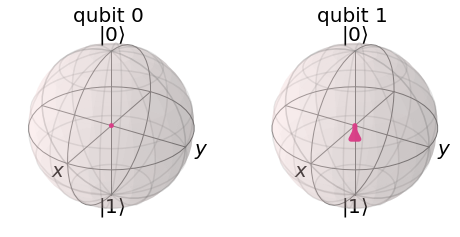



For inputs 0 1 Representation of Entangled States are:


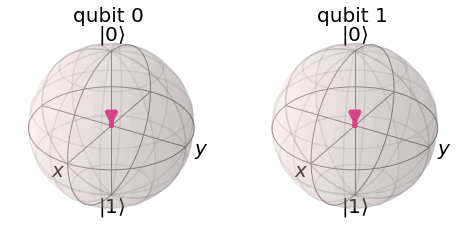



For inputs 1 0 Representation of Entangled States are:


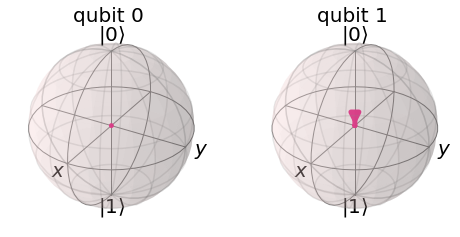



For inputs 1 1 Representation of Entangled States are:


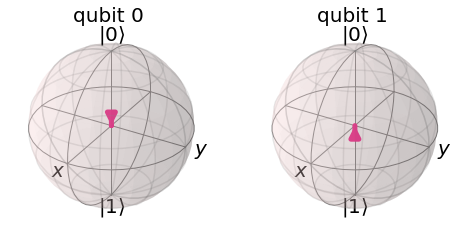

In [3]:
print('Note: Since these qubits are in entangled state, their state cannot be written as two separate qubit states. This also means that we lose information when we try to plot our state on separate Bloch spheres as seen below.\n')
        
for inp2 in ['0', '1']:
    for inp1 in ['0', '1']:
        qc, state, result = createBellStates(inp1, inp2)
        
        print('For inputs',inp2,inp1,'Representation of Entangled States are:')
        
        # Uncomment any of the below functions to visualize the resulting quantum states
        
        # Draw the quantum circuit
        #display(qc.draw())

        # Plot states on QSphere
        #display(plot_state_qsphere(state))

        # Plot states on Bloch Multivector
        display(plot_bloch_multivector(state))

        # Plot histogram
        #display(plot_histogram(result.get_counts()))
        
        # Plot state matrix like a city
        #display(plot_state_city(state))

        # Represent state matix using Pauli operators as the basis
        #display(plot_state_paulivec(state))

        # Plot state matrix as Hinton representation
        #display(plot_state_hinton(state))
        
        print('\n')

|Input State|Circuit|QSphere Plot|Histogram|City Plot|Paulivec|Hinton Plot|
|-|-|-|-|-|-|-|
|q0 = 0<br> q1 = 0|![alt](images/L4_Bell_Circuit_00>.png)|![alt](images/L4_Bell_QSphere_00>.png)|![alt](images/L4_Bell_Histogram_00>.png)|![alt](images/L4_Bell_CityPlot_00>.png)|![alt](images/L4_Bell_Paulivec_00>.png)|![alt](images/L4_Bell_HintonPlot_00>.png)|
|q0 = 1<br> q1 = 0|![alt](images/L4_Bell_Circuit_01>.png)|![alt](images/L4_Bell_QSphere_01>.png)|![alt](images/L4_Bell_Histogram_01>.png)|![alt](images/L4_Bell_CityPlot_01>.png)|![alt](images/L4_Bell_Paulivec_01>.png)|![alt](images/L4_Bell_HintonPlot_01>.png)|
|q0 = 0<br> q1 = 1|![alt](images/L4_Bell_Circuit_10>.png)|![alt](images/L4_Bell_QSphere_10>.png)|![alt](images/L4_Bell_Histogram_10>.png)|![alt](images/L4_Bell_CityPlot_10>.png)|![alt](images/L4_Bell_Paulivec_10>.png)|![alt](images/L4_Bell_HintonPlot_10>.png)|
|q0 = 1<br> q1 = 1|![alt](images/L4_Bell_Circuit_11>.png)|![alt](images/L4_Bell_QSphere_11>.png)|![alt](images/L4_Bell_Histogram_11>.png)|![alt](images/L4_Bell_CityPlot_11>.png)|![alt](images/L4_Bell_Paulivec_11>.png)|![alt](images/L4_Bell_HintonPlot_11>.png)|

<h2 style="font-size:24px;">Part 2: Bell States on Real Quantum Device</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Run Bell State circuit on real quantum device.</p>
</div>

In [4]:
from qiskit import IBMQ, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools import job_monitor

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2
                                    and not x.configuration().simulator
                                    and x.status().operational==True))

In [5]:
def createBSRealDevice(inp1, inp2):
    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr, cr)
    qc.reset(range(2))

    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)

    qc.barrier()

    qc.h(0)
    qc.cx(0,1)
    
    qc.measure(qr, cr)

    job = execute(qc, backend=backend, shots=100)
    job_monitor(job)
    result = job.result()

    return qc, result

For inputs 0 0 Representation of Entangled States are,
Job Status: job has successfully run


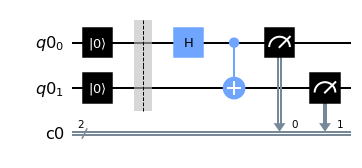

In [6]:
inp1 = 0
inp2 = 0
       
print('For inputs',inp2,inp1,'Representation of Entangled States are,')
        
#first results
qc, first_result = createBSRealDevice(inp1, inp2)
first_counts = first_result.get_counts()

# Draw the quantum circuit
display(qc.draw())


Job Status: job has successfully run


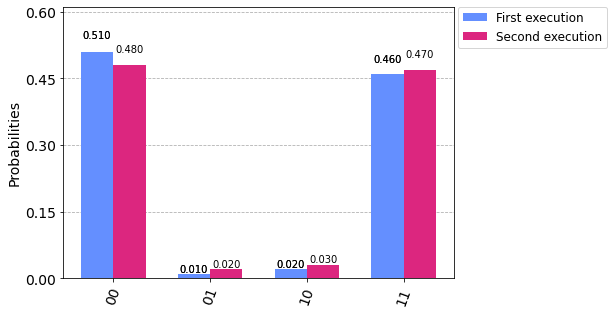

In [7]:
#second results
qc, second_result = createBSRealDevice(inp1, inp2)
second_counts = second_result.get_counts()


# Plot results on histogram with legend
legend = ['First execution', 'Second execution']
plot_histogram([first_counts, second_counts], legend=legend)

<h2 style="font-size:24px;">Part 3: 3-Qubit GHZ Circuit</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Create a 3-qubit GHZ circuit and visualize the states.</p>
</div>

In [8]:
def ghzCircuit(inp1, inp2, inp3):
    
    qc = QuantumCircuit(3)
    qc.reset(range(3))
    
    if inp1 == '1':
        qc.x(0)
    if inp2 == '1':
        qc.x(1)
    if inp3 == '1':
        qc.x(2)
    
    qc.barrier()
    
    qc.h(0)
    qc.cx(0,1)
    qc.cx(0,2)
    
    qc.save_statevector()
    qobj = assemble(qc)
    result = sim.run(qobj).result()
    state = result.get_statevector()

    return qc, state, result

Note: Since these qubits are in entangled state, their state cannot be written as two separate qubit states. This also means that we lose information when we try to plot our state on separate Bloch spheres as seen below.

For inputs 0 0 0 Representation of GHZ States are:


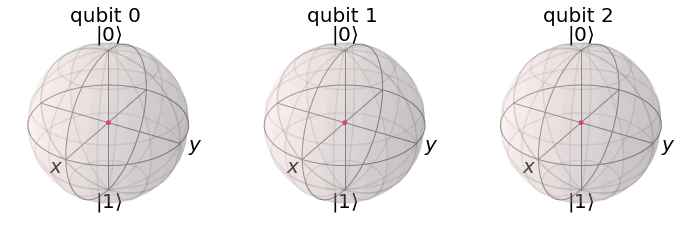



For inputs 0 0 1 Representation of GHZ States are:


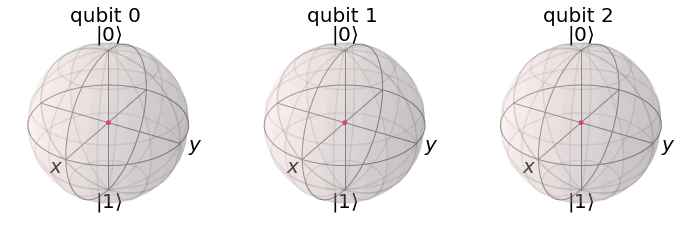



For inputs 0 1 0 Representation of GHZ States are:


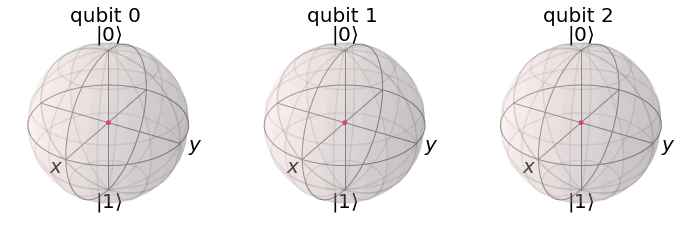



For inputs 0 1 1 Representation of GHZ States are:


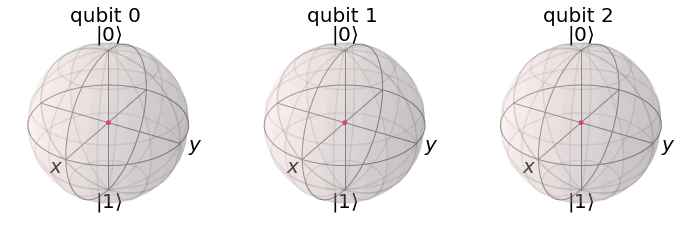



For inputs 1 0 0 Representation of GHZ States are:


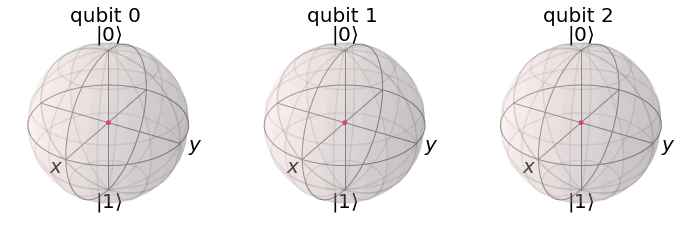



For inputs 1 0 1 Representation of GHZ States are:


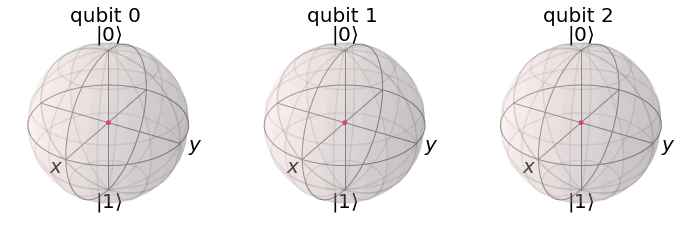



For inputs 1 1 0 Representation of GHZ States are:


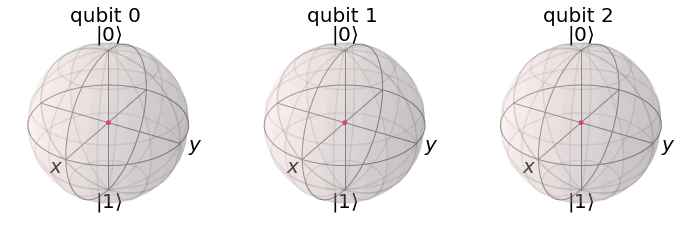



For inputs 1 1 1 Representation of GHZ States are:


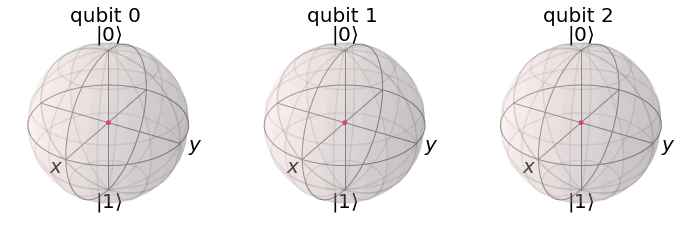

In [9]:
print('Note: Since these qubits are in entangled state, their state cannot be written as two separate qubit states. This also means that we lose information when we try to plot our state on separate Bloch spheres as seen below.\n')

for inp3 in ['0','1']:
    for inp2 in ['0','1']:
        for inp1 in ['0','1']:
            qc, state, result = ghzCircuit(inp1, inp2, inp3)

            print('For inputs',inp3,inp2,inp1,'Representation of GHZ States are:')

            # Uncomment any of the below functions to visualize the resulting quantum states

            # Draw the quantum circuit
            #display(qc.draw())

            # Plot states on QSphere
            #display(plot_state_qsphere(state))

            # Plot states on Bloch Multivector
            display(plot_bloch_multivector(state))

            # Plot histogram
            #display(plot_histogram(result.get_counts()))

            # Plot state matrix like a city
            #display(plot_state_city(state))

            # Represent state matix using Pauli operators as the basis
            #display(plot_state_paulivec(state))

            # Plot state matrix as Hinton representation
            #display(plot_state_hinton(state))

            print('\n')

|Input State|Circuit|QSphere Plot|Histogram|City Plot|Paulivec|Hinton Plot|
|-|-|-|-|-|-|-|
|q0 = 0; q1 = 0; q2 = 0|![alt](images/L4_Circuit_000>.png)|![alt](images/L4_QSphere_000>.png)|![alt](images/L4_Histogram_000>.png)|![alt](images/L4_CityPlot_000>.png)|![alt](images/L4_Paulivec_000>.png)|![alt](images/L4_HintonPlot_000>.png)|
|q0 = 1; q1 = 0; q2 = 0|![alt](images/L4_Circuit_100>.png)|![alt](images/L4_QSphere_100>.png)|![alt](images/L4_Histogram_100>.png)|![alt](images/L4_CityPlot_100>.png)|![alt](images/L4_Paulivec_100>.png)|![alt](images/L4_HintonPlot_100>.png)|
|q0 = 0; q1 = 1; q2 = 0|![alt](images/L4_Circuit_010>.png)|![alt](images/L4_QSphere_010>.png)|![alt](images/L4_Histogram_010>.png)|![alt](images/L4_CityPlot_010>.png)|![alt](images/L4_Paulivec_010>.png)|![alt](images/L4_HintonPlot_010>.png)|
|q0 = 1; q1 = 1; q2 = 0|![alt](images/L4_Circuit_110>.png)|![alt](images/L4_QSphere_110>.png)|![alt](images/L4_Histogram_110>.png)|![alt](images/L4_CityPlot_110>.png)|![alt](images/L4_Paulivec_110>.png)|![alt](images/L4_HintonPlot_110>.png)|
|q0 = 0; q1 = 0; q2 = 1|![alt](images/L4_Circuit_001>.png)|![alt](images/L4_QSphere_001>.png)|![alt](images/L4_Histogram_001>.png)|![alt](images/L4_CityPlot_001>.png)|![alt](images/L4_Paulivec_001>.png)|![alt](images/L4_HintonPlot_001>.png)|
|q0 = 1; q1 = 0; q2 = 1|![alt](images/L4_Circuit_101>.png)|![alt](images/L4_QSphere_101>.png)|![alt](images/L4_Histogram_101>.png)|![alt](images/L4_CityPlot_101>.png)|![alt](images/L4_Paulivec_101>.png)|![alt](images/L4_HintonPlot_101>.png)|
|q0 = 0; q1 = 1; q2 = 1|![alt](images/L4_Circuit_011>.png)|![alt](images/L4_QSphere_011>.png)|![alt](images/L4_Histogram_011>.png)|![alt](images/L4_CityPlot_011>.png)|![alt](images/L4_Paulivec_011>.png)|![alt](images/L4_HintonPlot_011>.png)|
|q0 = 1; q1 = 1; q2 = 1|![alt](images/L4_Circuit_111>.png)|![alt](images/L4_QSphere_111>.png)|![alt](images/L4_Histogram_111>.png)|![alt](images/L4_CityPlot_111>.png)|![alt](images/L4_Paulivec_111>.png)|![alt](images/L4_HintonPlot_111>.png)|

<h2 style="font-size:24px;">Part 4: 5-Qubit GHZ Circuit</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Create a 5-qubit GHZ circuit and visualize the states.</p>
</div>

In [10]:
def ghz5QCircuit(inp1, inp2, inp3, inp4, inp5):
    
    qc = QuantumCircuit(5)
    qc.reset(range(5))
    
    if inp1 == '1':
        qc.x(0)
    if inp2 == '1':
        qc.x(1)
    if inp3 == '1':
        qc.x(2)
    if inp4 == '1':
        qc.x(3)
    if inp5 == '1':
        qc.x(4)
    
    qc.barrier()
    
    qc.h(0)
    qc.cx(0,1)
    qc.cx(0,2)
    qc.cx(0,3)
    qc.cx(0,4)
    
    qc.save_statevector()
    qobj = assemble(qc)
    result = sim.run(qobj).result()
    state = result.get_statevector()

    return qc, state, result

For inputs 0 0 0 0 0 Representation of GHZ States are:


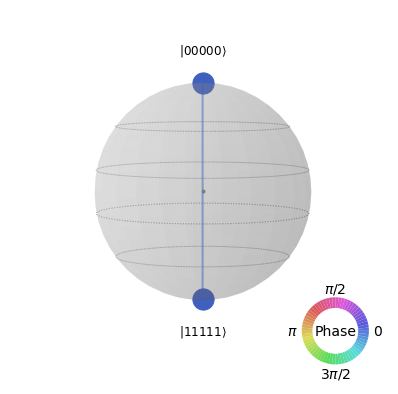



For inputs 0 0 0 0 1 Representation of GHZ States are:


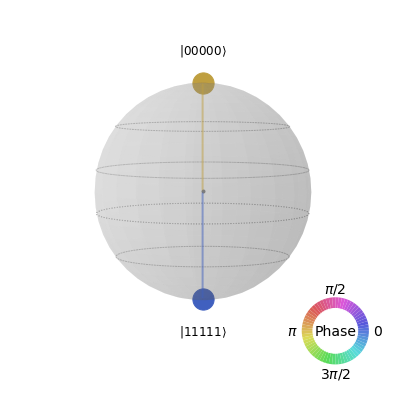



For inputs 0 0 0 1 0 Representation of GHZ States are:


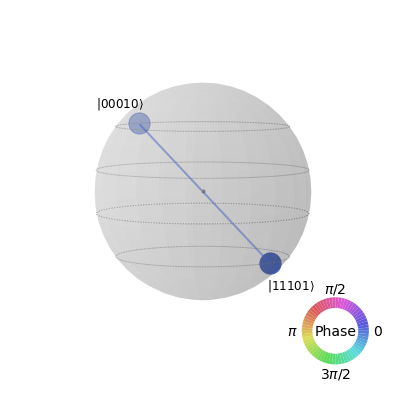



For inputs 0 0 0 1 1 Representation of GHZ States are:


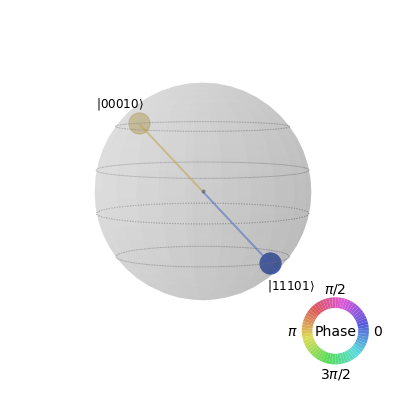



For inputs 0 0 1 0 0 Representation of GHZ States are:


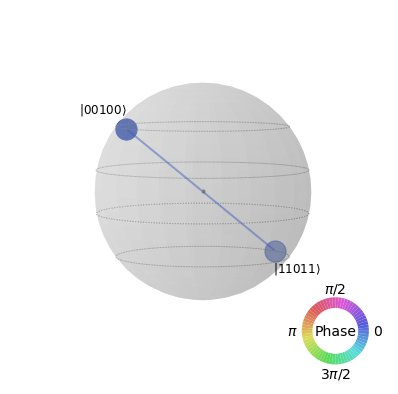



For inputs 0 0 1 0 1 Representation of GHZ States are:


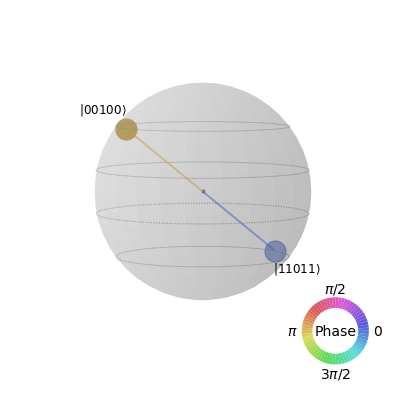



For inputs 0 0 1 1 0 Representation of GHZ States are:


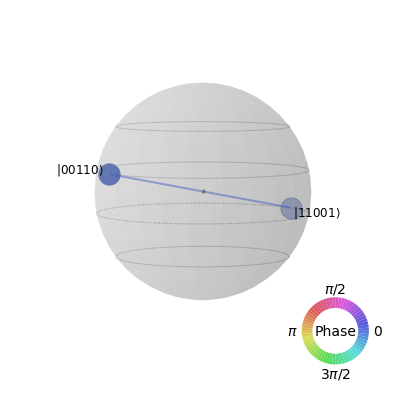



For inputs 0 0 1 1 1 Representation of GHZ States are:


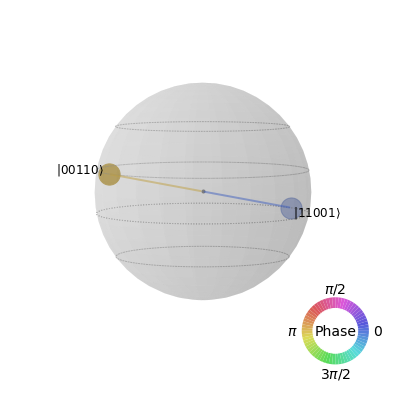



For inputs 0 1 0 0 0 Representation of GHZ States are:


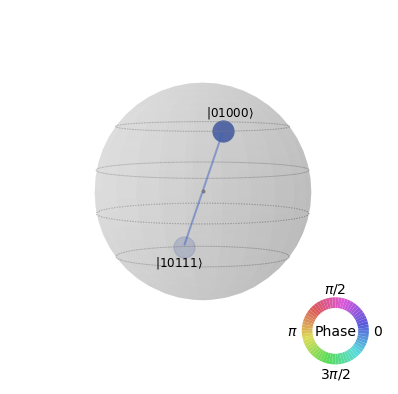



For inputs 0 1 0 0 1 Representation of GHZ States are:


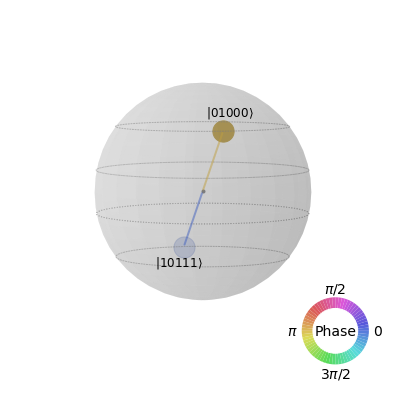



For inputs 0 1 0 1 0 Representation of GHZ States are:


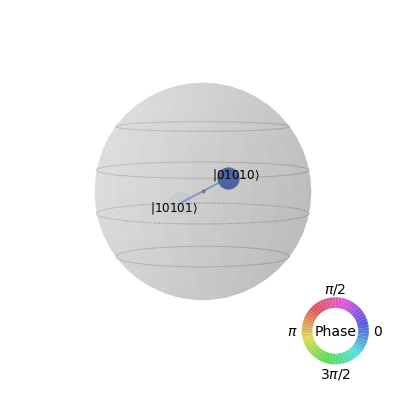



For inputs 0 1 0 1 1 Representation of GHZ States are:


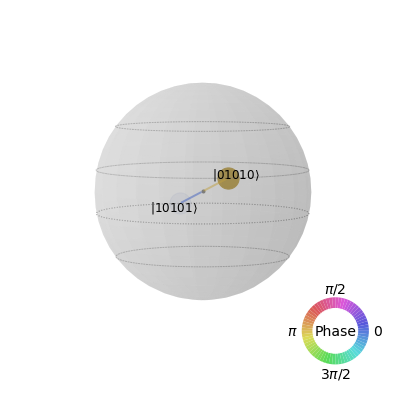



For inputs 0 1 1 0 0 Representation of GHZ States are:


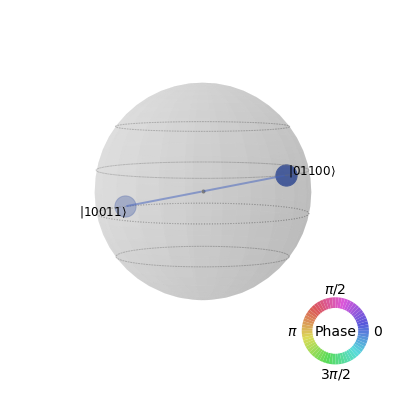



For inputs 0 1 1 0 1 Representation of GHZ States are:


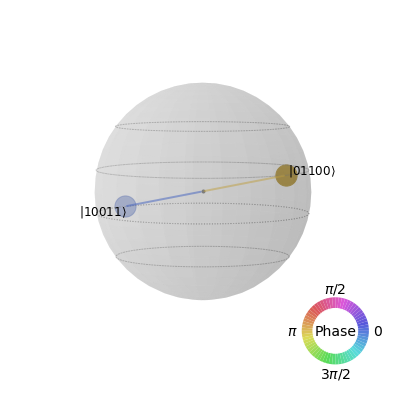



For inputs 0 1 1 1 0 Representation of GHZ States are:


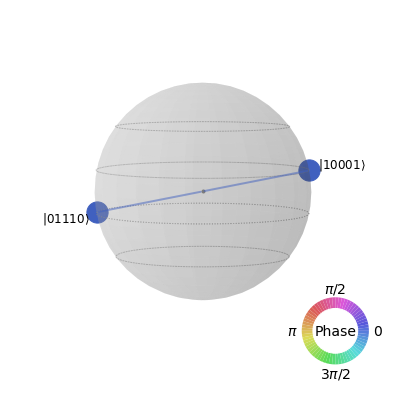



For inputs 0 1 1 1 1 Representation of GHZ States are:


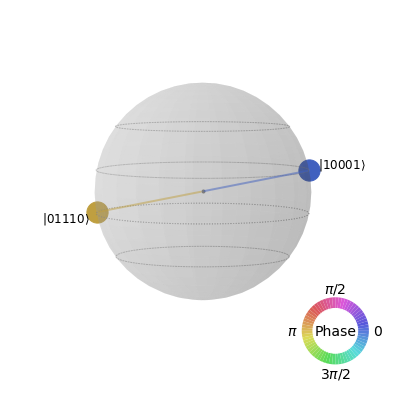



For inputs 1 0 0 0 0 Representation of GHZ States are:


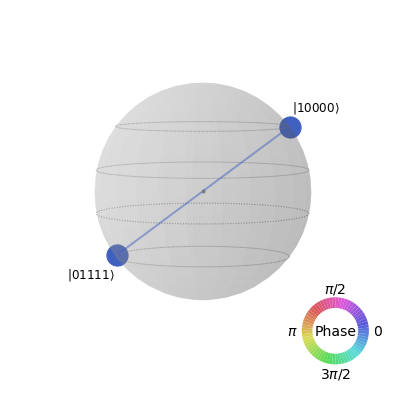



For inputs 1 0 0 0 1 Representation of GHZ States are:


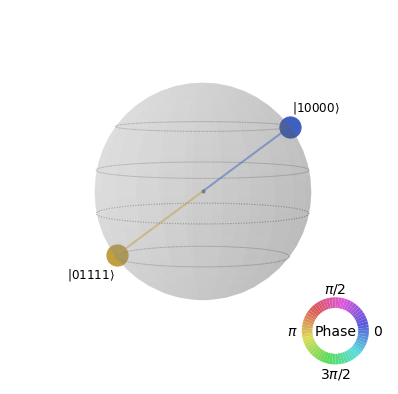



For inputs 1 0 0 1 0 Representation of GHZ States are:


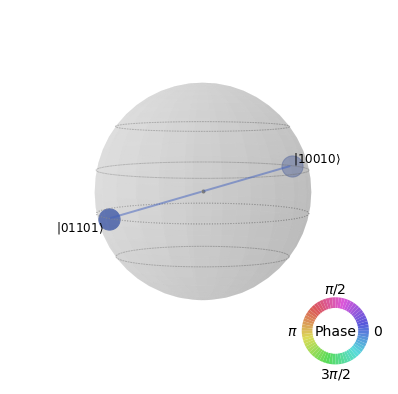



For inputs 1 0 0 1 1 Representation of GHZ States are:


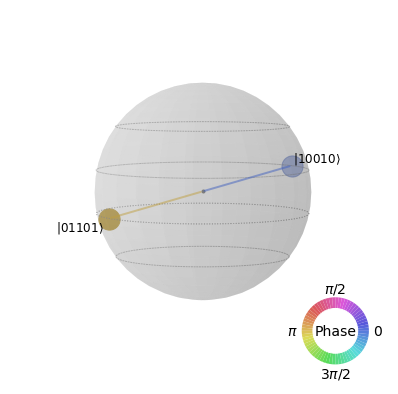



For inputs 1 0 1 0 0 Representation of GHZ States are:


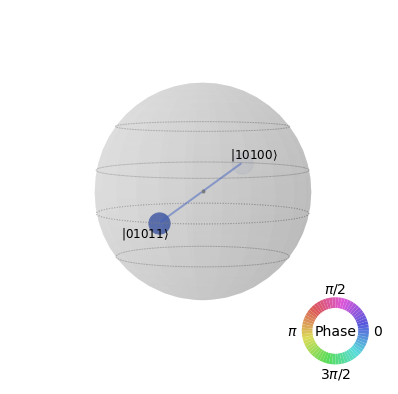



For inputs 1 0 1 0 1 Representation of GHZ States are:


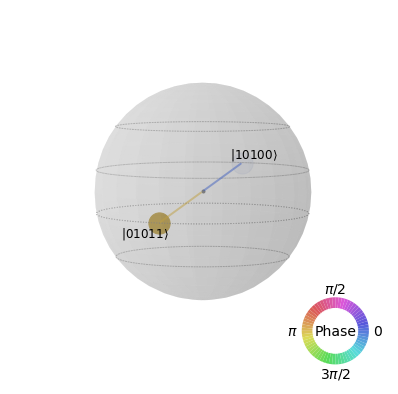



For inputs 1 0 1 1 0 Representation of GHZ States are:


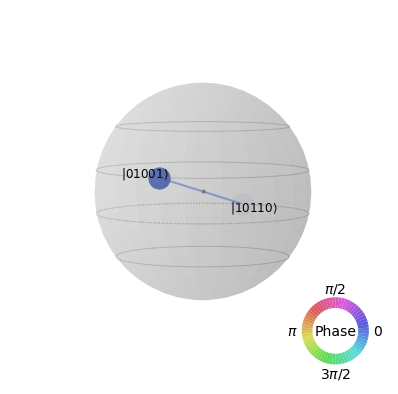



For inputs 1 0 1 1 1 Representation of GHZ States are:


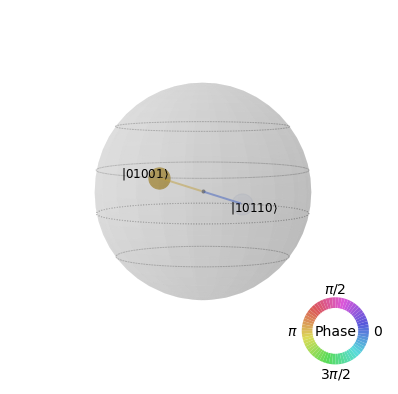



For inputs 1 1 0 0 0 Representation of GHZ States are:


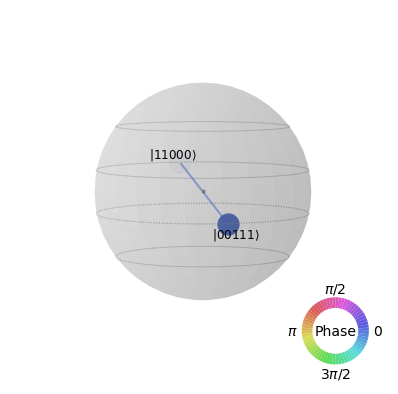



For inputs 1 1 0 0 1 Representation of GHZ States are:


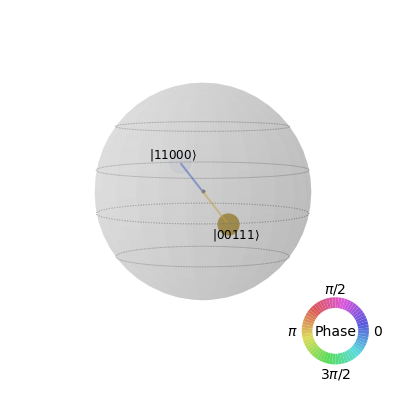



For inputs 1 1 0 1 0 Representation of GHZ States are:


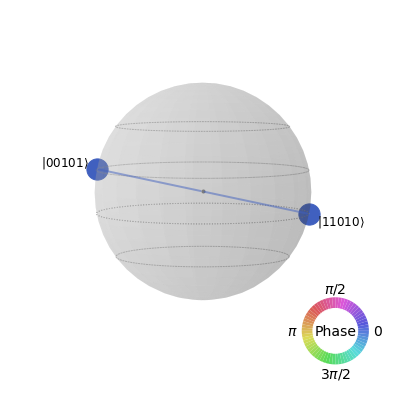



For inputs 1 1 0 1 1 Representation of GHZ States are:


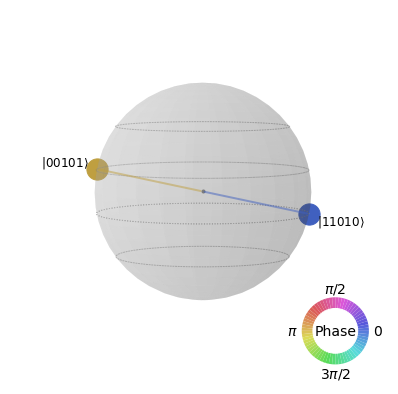



For inputs 1 1 1 0 0 Representation of GHZ States are:


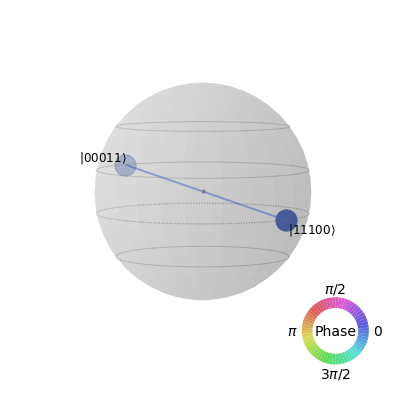



For inputs 1 1 1 0 1 Representation of GHZ States are:


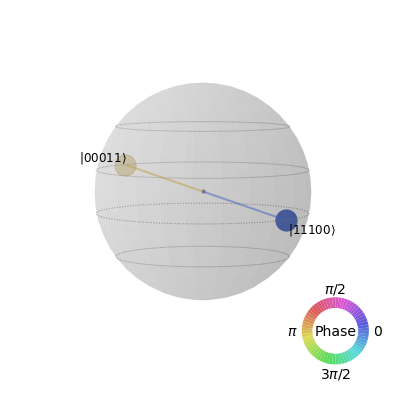



For inputs 1 1 1 1 0 Representation of GHZ States are:


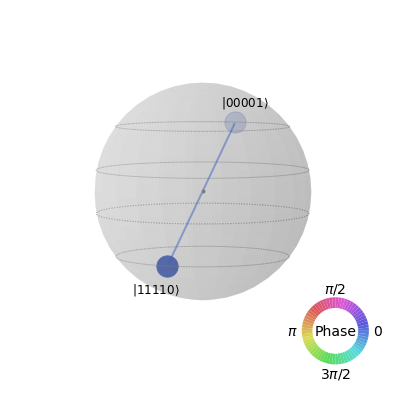



For inputs 1 1 1 1 1 Representation of GHZ States are:


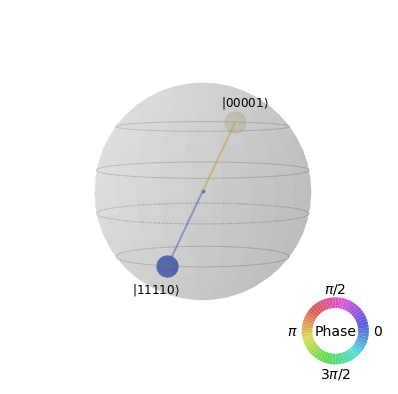

In [11]:
for inp5 in ['0','1']:
    for inp4 in ['0','1']:
        for inp3 in ['0','1']:
            for inp2 in ['0','1']:
                for inp1 in ['0','1']:
                    qc, state, result = ghz5QCircuit(inp1, inp2, inp3, inp4, inp5)

                    print('For inputs',inp5,inp4,inp3,inp2,inp1,'Representation of GHZ States are:')

                    # Uncomment any of the below functions to visualize the resulting quantum states

                    # Draw the quantum circuit
                    #display(qc.draw())

                    # Plot states on QSphere
                    display(plot_state_qsphere(state))

                    # Plot states on Bloch Multivector
                    #display(plot_bloch_multivector(state))

                    # Plot histogram
                    #display(plot_histogram(result.get_counts()))

                    # Plot state matrix like a city
                    #display(plot_state_city(state))

                    # Represent state matix using Pauli operators as the basis
                    #display(plot_state_paulivec(state))

                    # Plot state matrix as Hinton representation
                    #display(plot_state_hinton(state))

                    print('\n')

<h2 style="font-size:24px;">Part 5: Real Quantum Device</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Run 5-qubit GHZ circuit on real quantum device.</p>
</div>

In [13]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 5
                                    and not x.configuration().simulator
                                    and x.status().operational==True))

In [14]:
def create5QGHZRealDevice(inp1, inp2, inp3, inp4, inp5):
    qr = QuantumRegister(5)
    cr = ClassicalRegister(5)
    qc = QuantumCircuit(qr, cr)
    qc.reset(range(5))

    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    if inp3=='1':
        qc.x(1)
    if inp4=='1':
        qc.x(1)
    if inp5=='1':
        qc.x(1)

    qc.barrier()

    qc.h(0)
    qc.cx(0,1)
    qc.cx(0,2)
    qc.cx(0,3)
    qc.cx(0,4)
    
    qc.measure(qr, cr)

    job = execute(qc, backend=backend, shots=1000)
    job_monitor(job)
    result = job.result()

    return qc, result

Job Status: job has successfully run


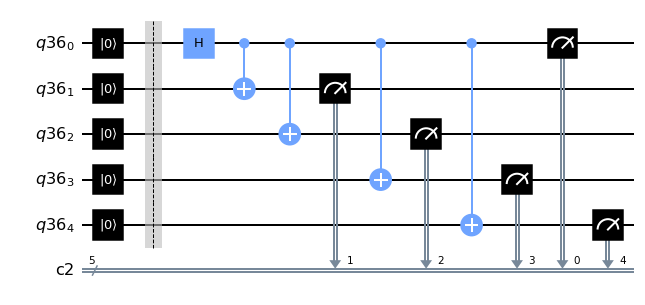

In [15]:
inp1 = 0
inp2 = 0
inp3 = 0
inp4 = 0
inp5 = 0

#first results
qc, first_result = create5QGHZRealDevice(inp1, inp2, inp3, inp4, inp5)
first_counts = first_result.get_counts()

# Draw the quantum circuit
display(qc.draw())

Job Status: job has successfully run
For inputs 0 0 0 0 0 Representation of GHZ circuit states are,


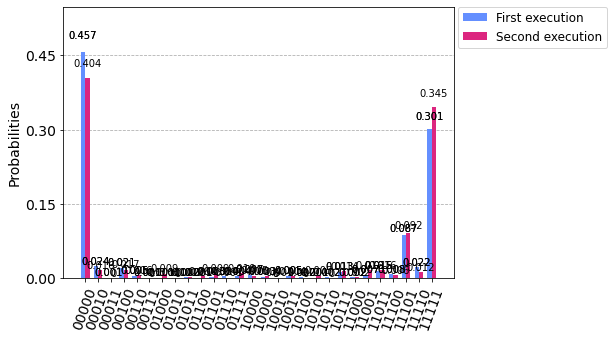

In [16]:
#second results
qc, second_result = create5QGHZRealDevice(inp1, inp2, inp3, inp4, inp5)
second_counts = second_result.get_counts()

print('For inputs',inp5,inp4,inp3,inp2,inp1,'Representation of GHZ circuit states are,')

# Plot results on histogram with legend
legend = ['First execution', 'Second execution']
plot_histogram([first_counts, second_counts], legend=legend)

In [17]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.19.1', 'qiskit-aer': '0.9.1', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.2', 'qiskit-aqua': None, 'qiskit': '0.33.1', 'qiskit-nature': '0.2.2', 'qiskit-finance': '0.2.1', 'qiskit-optimization': '0.2.3', 'qiskit-machine-learning': '0.2.1'}